#決定木の実装

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
# データセットの読み込み
dataset = load_iris()
columns_name = dataset.feature_names
x = dataset.data
t = dataset.target

In [3]:
# 読み込んだデータセットを DataFrame に変換
df = pd.DataFrame(data=x, columns=columns_name)
df['Target'] = t

df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
# t のユニークな値を確認する
np.unique(t)

array([0, 1, 2])

In [5]:
x.shape, t.shape

((150, 4), (150,))

In [6]:
# データセットの分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [7]:
# モデルの定義
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

In [8]:
# モデルの学習
dtree.fit(x_train, t_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [9]:
# モデルの検証
print('train score : ', dtree.score(x_train, t_train))
print('test score : ', dtree.score(x_test, t_test))

train score :  1.0
test score :  0.9777777777777777


In [10]:
# 推論
dtree.predict(x_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [11]:
# 木構造の書き出し
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(dtree)

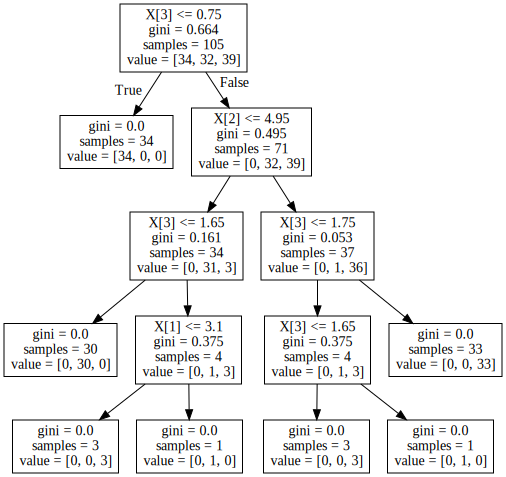

In [12]:
# 木構造の表示
graph_tree = graphviz.Source(dot_data)
graph_tree

In [13]:
# feature importance
# 入力変数の影響度
feature_importance = dtree.feature_importances_
feature_importance

array([0.        , 0.02150464, 0.39766951, 0.58082584])

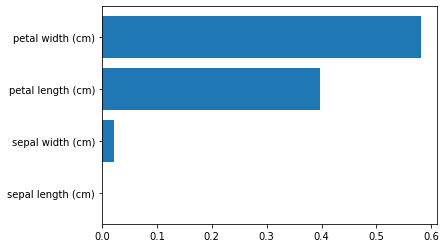

In [14]:
# 可視化
y = columns_name
width = feature_importance

# 横向きで表示
plt.barh(y=y, width=width);

In [15]:
'''
代表的な分類アルゴリズム
- サポートベクトルマシン
- ロジスティック回帰
'''

'\n代表的な分類アルゴリズム\n- サポートベクトルマシン\n- ロジスティック回帰\n'

#SVMの実装

In [16]:
# モデルの定義
from sklearn.svm import SVC
svc = SVC()

In [17]:
# モデルの学習
svc.fit(x_train, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777


In [19]:
# 標準化の準備
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

      
std_scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
# 標準化
x_train_std = std_scaler.transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [21]:
# 平均
round(x_train_std.mean())

0.0

In [22]:
# 標準偏差
round(x_train_std.std())

1.0

In [23]:
# モデルの定義
svc_std = SVC()

In [24]:
# モデルの学習
svc_std.fit(x_train_std, t_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
# モデルの検証
print('train score : ', svc.score(x_train, t_train))
print('test score : ', svc.score(x_test, t_test))

print('train score scaling : ', svc_std.score(x_train_std, t_train))
print('test score scaling : ', svc_std.score(x_test_std, t_test))

train score :  0.9714285714285714
test score :  0.9777777777777777
train score scaling :  0.9714285714285714
test score scaling :  0.9777777777777777


#ロジスティック回帰の実装

In [26]:
# モデルの定義
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1.0)

In [27]:
# モデルの学習
log_reg.fit(x_train, t_train)

/Users/yutaro/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# モデルの検証
print('train score : ', log_reg.score(x_train, t_train))
print('test score : ', log_reg.score(x_test, t_test))

train score :  0.9809523809523809
test score :  0.9777777777777777


In [29]:
# 重みの形
log_reg.coef_.shape

(3, 4)

In [30]:
# 重み（係数）
log_reg.coef_

array([[-0.39740519,  0.83327125, -2.2893712 , -0.97846431],
       [ 0.54380792, -0.29005694, -0.2323913 , -0.65813298],
       [-0.14640273, -0.54321431,  2.5217625 ,  1.6365973 ]])

In [31]:
# 切片
log_reg.intercept_

array([  8.99889742,   1.54474996, -10.54364737])

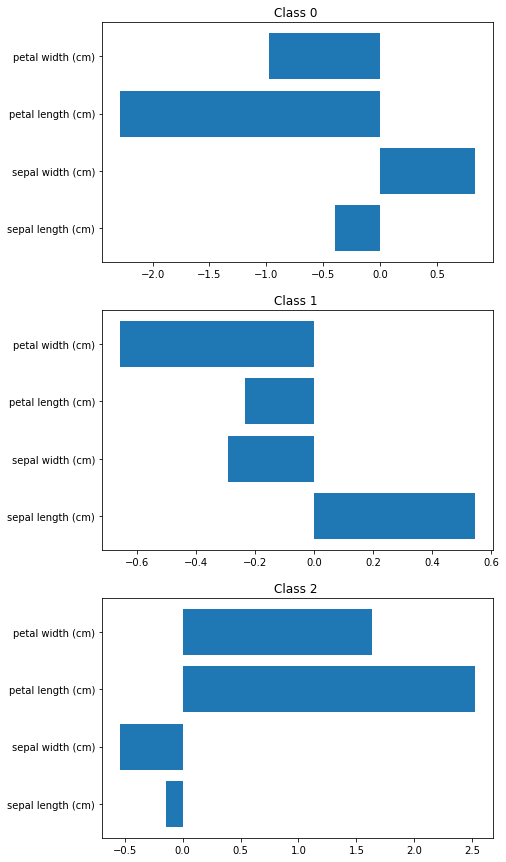

In [32]:
# それぞれの重みを確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    ax.barh(y=dataset.feature_names, width=log_reg.coef_[i])
    ax.set_title('Class {} '.format(i))

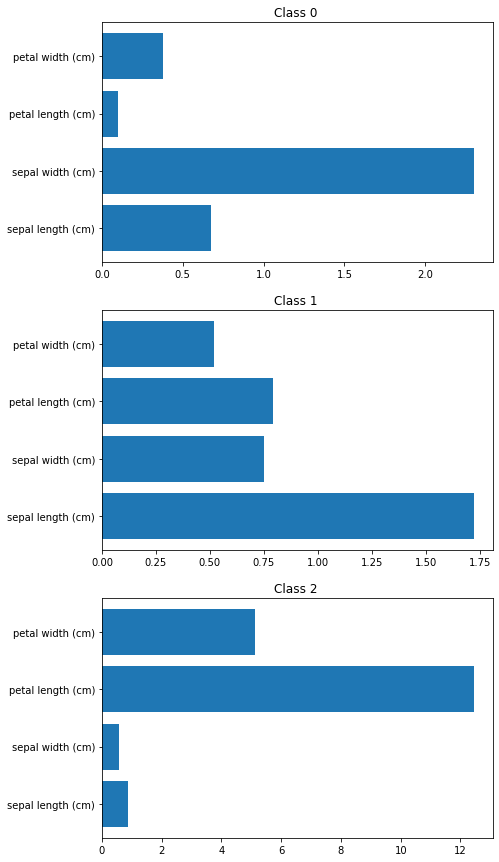

In [33]:
# 各オッズ比を確認
fig = plt.figure(figsize=(7, 15))

for i in range(len(log_reg.coef_)):
    ax = fig.add_subplot(3, 1, i+1)
    odds_ratio = np.exp(log_reg.coef_[i])
    ax.barh(y=dataset.feature_names, width=odds_ratio)
    ax.set_title('Class {} '.format(i))

In [34]:
# カテゴリ 0 の場合
print('重み(係数):',log_reg.coef_[0])
print('オッズ比:',  np.exp(log_reg.coef_[0]))

重み(係数): [-0.39740519  0.83327125 -2.2893712  -0.97846431]
オッズ比: [0.67206166 2.30083305 0.10133016 0.3758879 ]


In [35]:
# 目標値の取得
log_reg.predict([x_test[0]])

array([2])

In [36]:
# 各カテゴリに対する確率の確認
log_reg.predict_proba([x_test[0]])

array([[1.31835661e-04, 5.99051952e-02, 9.39962969e-01]])

分類の評価方法

Accuracy（正解率）
Precision（適合率）
Recall（再現率）
F1score（F 値）(適合率と再現率の調和平均)

In [38]:
# 不均衡データ
df = pd.read_csv('classification_imb.csv')
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x49,x50,x51,x52,x53,x54,x55,x56,x57,Target
0,0,2,0,0,6,1,0,0,0,0,...,4,3,9,0,1,1,0,1,0,1
1,1,3,8,0,0,1,0,0,0,0,...,3,3,8,0,1,1,1,1,0,1
2,2,1,1,1,0,0,0,0,1,0,...,1,2,8,0,1,1,1,0,0,1
3,5,1,9,0,0,1,0,0,0,0,...,1,3,8,0,1,1,0,0,0,1
4,0,1,2,0,0,1,0,0,0,0,...,0,3,6,0,1,0,1,0,1,1


In [39]:
df.shape

(29760, 58)

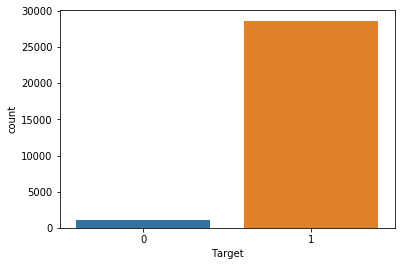

In [40]:
sns.countplot(x='Target', data=df);

In [41]:
# 入力変数と目的変数の切り分け
x = df.drop('Target', axis=1).values
t = df['Target'].values

print(x.shape, t.shape)

(29760, 57) (29760,)


In [42]:
# 学習用データセットとテスト用データセットの分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0)

In [43]:
# モデルの定義
log_reg = LogisticRegression()

In [44]:
# モデルの学習
log_reg.fit(x_train, t_train)

# モデルの検証
print(log_reg.score(x_train, t_train))
print(log_reg.score(x_test, t_test))

0.9632776497695853
0.961581541218638


/Users/yutaro/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [45]:
# 推論
y_predict = log_reg.predict(x_test)

In [46]:
# ユニークな値
np.unique(y_predict)

array([1])

In [47]:
np.unique(t_test, return_counts=True)

(array([0, 1]), array([ 343, 8585]))

In [48]:
#混合行列
from sklearn import metrics

In [49]:
# ラベルの取り出し
labels = list(np.unique(t_train))
labels

[0, 1]

In [50]:
# 混同行列の取得
confusion_matrix = metrics.confusion_matrix(t_test, y_predict)
confusion_matrix

array([[   0,  343],
       [   0, 8585]])

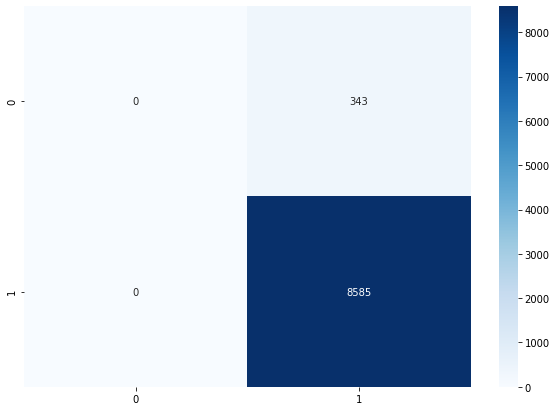

In [51]:
# ヒートマップで可視化
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=True, fmt='.0f', cmap='Blues');

In [52]:
precision = metrics.precision_score(t_test, y_predict, average=None)
precision

/Users/yutaro/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.        , 0.96158154])

In [53]:
recall = metrics.recall_score(t_test, y_predict, average=None)
recall

array([0., 1.])

In [54]:
f1_score = metrics.f1_score(t_test, y_predict, average=None)
f1_score

array([0.        , 0.98041455])

In [55]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_test, y_predict)

/Users/yutaro/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


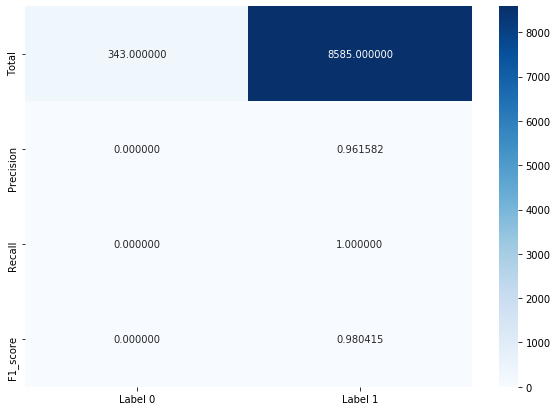

In [56]:
# ヒートマップで可視化
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]), 
    index=['Total', 'Precision', 'Recall', 'F1_score'], 
    columns=['Label 0','Label 1']
)

plt.figure(figsize=(10, 7))
sns.heatmap(df_total, annot=True, fmt='.6f', cmap='Blues');